# EDA-Example Note Project -1


**Introduction to EDA**

The main objective of this notebook is to cover the steps involved in Data pre-processing, Feature Engineering, and different stages of Exploratory Data Analysis, which is an essential step in any research analysis.

Data pre-processing, Feature Engineering, and EDA are fundamental early steps after data collection. Still, they are not limited to where the data is simply visualized, plotted, and manipulated, without any assumptions, to assess the quality of the data and building models.

![image.png](attachment:image.png)


# 1: Getting the Right Environment

**import Python Libraries**
The first step involved in ML using python is understanding and playing around with our data using libraries. Here is the link to the dataset.

Import all libraries which are required for our analysis, such as Data Loading, Statistical analysis, Visualizations, Data Transformations, Merge and Joins, etc.

Pandas and Numpy have been used for Data Manipulation and numerical Calculations

Matplotlib and Seaborn have been used for Data visualizations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 2: Reading and Understanding the Datasets

Reading Dataset
The Pandas library offers a wide range of possibilities for loading data into the pandas DataFrame from files like JSON, .csv, .xlsx, .sql, .pickle, .html, .txt, images etc.

Most of the data are available in a tabular format of CSV files. It is trendy and easy to access. Using the read_csv() function, data can be converted to a pandas DataFrame.

## Acknoledgement

I wanted to perform on Costco or Sam's Club dataset , but found a similar supermarket dataset with sales.

The dataset provided by Aung Paye https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

## Dataset Description
The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.
1. Invoice id: Computer generated sales slip invoice identification number
2. Branch: Branch of supercenter (3 branches are available identified by A, B and C).
3. City: Location of supercenters.
4. Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
5. Gender: Gender type of customer
6. Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
7. Unit price: Price of each product in $
8. Quantity: Number of products purchased by customer
9. Tax: 5% tax fee for customer buying
10. Total: Total price including tax
11. Date: Date of purchase (Record available from January 2019 to March 2019)
12. Time: Purchase time (10am to 9pm)
13. Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
14. COGS: Cost of goods sold
15. Gross margin percentage: Gross margin percentage
16. Gross income: Gross income
17. Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)cale of 1 to 10)

### Loading the dataset

In [2]:
df = pd.read_csv('supermarket_sales.csv')

Analyzing the data

Before we make any inferences, we listen to our data by examining all variables in the data.

The main goal of data understanding is to gain general insights about the data, which covers the number of rows and columns, values in the data, datatypes, and Missing values in the dataset.

shape – shape will display the number of observations(rows) and features(columns) in the dataset

In [3]:
df.shape

(1000, 17)

In [4]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

### Finidng Mising Values

Missing values Calculation
isnull() is widely been in all pre-processing steps to identify null values in the data

In our example, data.isnull().sum() is used to get the number of missing records in each column

The below code helps to calculate the percentage of missing values in each column

(data.isnull().sum()/(len(data)))*100

In [7]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
(df.isnull().sum()/(len(df)))*100

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
dtype: float64

There are no missing values

### Head and Tail of the Dataset

In [9]:
pd.concat([df.head(), df.tail()])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


### Duplicate Values

Check for duplication nunique() based on several unique values in each column and the data description, we can identify the continuous and categorical columns in the data. Duplicated data can be handled or removed based on further analysis

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [11]:
df.duplicated().sum()

0

Data Reduction
Some columns or variables can be dropped if they do not add value to our analysis.

### Identifying columns with low cardinality i.e. less than 5 unique values

In [12]:
potential_reductions = []
low_cardinality_cols = [col for col in df.columns if df[col].nunique() < 5]
potential_reductions.extend(low_cardinality_cols)
low_cardinality_cols

['Branch',
 'City',
 'Customer type',
 'Gender',
 'Payment',
 'gross margin percentage']

In [13]:
unique_values = {}
for col in ['Branch', 'City', 'Customer type', 'Gender', 'Payment', 'gross margin percentage']:
  unique_values[col] = df[col].nunique()  # Count unique values in each column

print("Number of Unique Values in Each Column:")
for col, count in unique_values.items():
  print(f"{col}: {count}")

Number of Unique Values in Each Column:
Branch: 3
City: 3
Customer type: 2
Gender: 2
Payment: 3
gross margin percentage: 1


From the above findings it is evident that "Branch" column with only 3 unique values is not giving any significant value to the data compared to the other 5 columns.
Hence "Branch" column can be dropped.

In [14]:
df=df.drop('Branch', axis=1)

In [15]:
df.columns

Index(['Invoice ID', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

# 3: Data Cleaning and Wrangling

Data Cleaning/Wrangling
Some names of the variables are not relevant and not easy to understand. Some data may have data entry errors, and some variables may need data type conversion. We need to fix this issue in the data.

In [16]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [17]:
df.columns

Index(['invoice_id', 'city', 'customer_type', 'gender', 'product_line',
       'unit_price', 'quantity', 'tax_5%', 'total', 'date', 'time', 'payment',
       'cogs', 'gross_margin_percentage', 'gross_income', 'rating'],
      dtype='object')

We have converted the column names from regular notation to snake case which aids in better readablity and ease of coding

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_id               1000 non-null   object 
 1   city                     1000 non-null   object 
 2   customer_type            1000 non-null   object 
 3   gender                   1000 non-null   object 
 4   product_line             1000 non-null   object 
 5   unit_price               1000 non-null   float64
 6   quantity                 1000 non-null   int64  
 7   tax_5%                   1000 non-null   float64
 8   total                    1000 non-null   float64
 9   date                     1000 non-null   object 
 10  time                     1000 non-null   object 
 11  payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross_margin_percentage  1000 non-null   float64
 14  gross_income             

From the above step we can see that few of the columns need datatype conversion.

In [19]:
df['date'] = pd.to_datetime(df['date']) # DType changed from object to datetime
df['gender'] = df['gender'].astype('category') # DType changed from object to category
df['product_line'] = df['product_line'].astype('category') # DType changed from object to category

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               1000 non-null   object        
 1   city                     1000 non-null   object        
 2   customer_type            1000 non-null   object        
 3   gender                   1000 non-null   category      
 4   product_line             1000 non-null   category      
 5   unit_price               1000 non-null   float64       
 6   quantity                 1000 non-null   int64         
 7   tax_5%                   1000 non-null   float64       
 8   total                    1000 non-null   float64       
 9   date                     1000 non-null   datetime64[ns]
 10  time                     1000 non-null   object        
 11  payment                  1000 non-null   object        
 12  cogs                     1000 non-n

### Feature Engineering
Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The main goal of Feature engineering is to create meaningful data from raw data.

#### Feature 1: Total Expenditure Per Customer

This combines the invoice_id and total columns to understand how much a particular customer spends on average.

In [21]:
df['total_expenditure_per_customer'] = df.groupby('invoice_id')['total'].transform('sum')

Used groupby('invoice_id') to group the dataframe by the unique customer identifier.
Within each group, appiedy the transform('sum') function on the total column. This calculates the sum of all total values for each customer across all their invoices.
The result is a new column named total_expenditure_per_customer that holds the total spending amount for each customer.

#### Feature 2: Average order Value

It calculates the average amount spent per invoice. It provides insights into typical purchase sizes.

In [22]:
df['average_order_value'] = df['total'] / df['quantity']

Created a new column named average_order_value by dividing the total amount by the quantity of items purchased in each invoice

#### Feature 3: Weekend vs Weekday Purchase

The feature categorizes purchases based on whether they happened on a weekend or weekday

In [23]:
def weekend_or_weekday(date):
  if date.dayofweek in [5, 6]:  # Access dayofweek directly from Timestamp
    return 'Weekend'
  else:
    return 'Weekday'

df['weekend_or_weekday'] = df['date'].apply(weekend_or_weekday)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   invoice_id                      1000 non-null   object        
 1   city                            1000 non-null   object        
 2   customer_type                   1000 non-null   object        
 3   gender                          1000 non-null   category      
 4   product_line                    1000 non-null   category      
 5   unit_price                      1000 non-null   float64       
 6   quantity                        1000 non-null   int64         
 7   tax_5%                          1000 non-null   float64       
 8   total                           1000 non-null   float64       
 9   date                            1000 non-null   datetime64[ns]
 10  time                            1000 non-null   object        
 11  payme

# 4: EDA -Exploratory Data Analysis

EDA Exploratory Data Analysis
Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

EDA can be leveraged to check for outliers, patterns, and trends in the given data.
EDA helps to find meaningful patterns in data.
EDA provides in-depth insights into the data sets to solve our business problems.
EDA gives a clue to impute missing values in the dataset

**Statistics Summary**
The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In python, this can be achieved using describe()

describe() function gives all statistics summary of data

describe()– Provide a statistics summary of data belonging to numerical datatype such as int, float

data.describe().T

In [25]:
df_summary = df.describe().T
df_summary

,count,mean,min,25%,50%,75%,max,std
unit_price,1000.0,55.67213,10.08,32.875,55.23,77.935,99.96,26.494628
quantity,1000.0,5.51,1.0,3.0,5.0,8.0,10.0,2.923431
tax_5%,1000.0,15.379369,0.5085,5.924875,12.088,22.44525,49.65,11.708825
total,1000.0,322.966749,10.6785,124.422375,253.848,471.35025,1042.65,245.885335
date,1000,2019-02-14 00:05:45.600000,2019-01-01 00:00:00,2019-01-24 00:00:00,2019-02-13 00:00:00,2019-03-08 00:00:00,2019-03-30 00:00:00,NaN
cogs,1000.0,307.58738,10.17,118.4975,241.76,448.905,993.0,234.17651
gross_margin_percentage,1000.0,4.761905,4.761905,4.761905,4.761905,4.761905,4.761905,0.0
gross_income,1000.0,15.379369,0.5085,5.924875,12.088,22.44525,49.65,11.708825
rating,1000.0,6.9727,4.0,5.5,7.0,8.5,10.0,1.71858
total_expenditure_per_customer,1000.0,322.966749,10.6785,124.422375,253.848,471.35025,1042.65,245.885335


**EDA Univariate Analysis**
Analyzing/visualizing the dataset by taking one variable at a time:

Data visualization is essential; we must decide what charts to plot to better understand the data. In this article, we visualize our data using Matplotlib and Seaborn libraries.

Matplotlib is a Python 2D plotting library used to draw basic charts we use Matplotlib.

Seaborn is also a python library built on top of Matplotlib that uses short lines of code to create and style statistical plots from Pandas and Numpy

Univariate analysis can be done for both Categorical and Numerical variables.

Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.


In [26]:
tem_df = df.copy()

In [27]:
tem_df['date'].describe()

count                          1000
mean     2019-02-14 00:05:45.600000
min             2019-01-01 00:00:00
25%             2019-01-24 00:00:00
50%             2019-02-13 00:00:00
75%             2019-03-08 00:00:00
max             2019-03-30 00:00:00
Name: date, dtype: object

In [28]:
df['gender'].value_counts()

gender
Female    501
Male      499
Name: count, dtype: int64

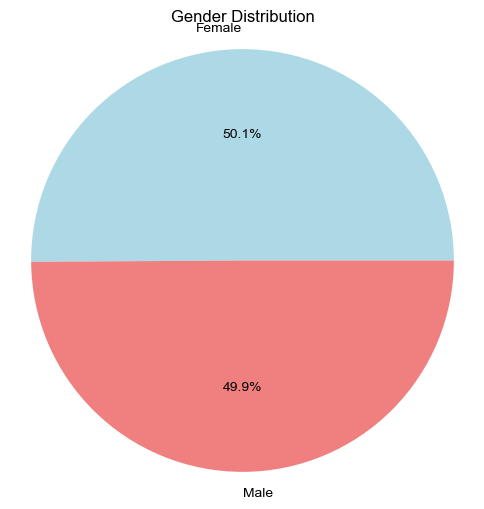

In [29]:
gender_counts = df['gender'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(6, 6))

pastel_colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow']

plt.pie(gender_counts.values, labels=gender_counts.index, autopct="%1.1f%%", colors=pastel_colors)
sns.set_style("whitegrid") 
plt.title("Gender Distribution")
plt.axis("equal")

plt.show()

### OBSERVATION
1. The pie chart reveals a near-equal distribution of genders among customers in the supermarket data.
2. Male: Represents approximately 49.9% of the customer base.
3. Female: Represents approximately 50.1% of the customer base.

In [32]:
product_line_counts = df['product_line'].value_counts().sort_values(ascending=False)  # Count products per line
product_line_counts

product_line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

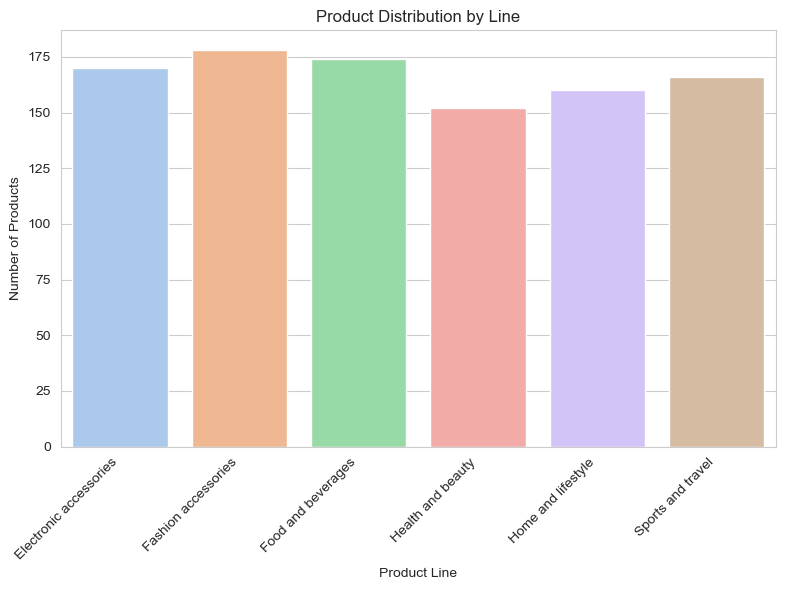

In [33]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x=product_line_counts.index,
    y=product_line_counts.values,
    palette="pastel"
)
plt.xlabel("Product Line")
plt.ylabel("Number of Products")
plt.title("Product Distribution by Line")
plt.xticks(rotation=45, ha="right") 
plt.tight_layout()
plt.show()

### OBSERVATION
1. The bar chart reveals a clear distribution of products across different lines.
2.  Based on the highest bar, "Fashion Accessories" appears to offer the most significant number of products compared to other lines.
3. The lowest bar indicates "Health and Beauty" has the fewest product offerings within the data set.


In [35]:
tem_df['quantity'].describe()

count    1000.000000
mean        5.510000
std         2.923431
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: quantity, dtype: float64

In [36]:
quantity_counts = df['quantity'].value_counts().sort_values(ascending=False)  # Count & sort quantities
quantity_counts

quantity
10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: count, dtype: int64

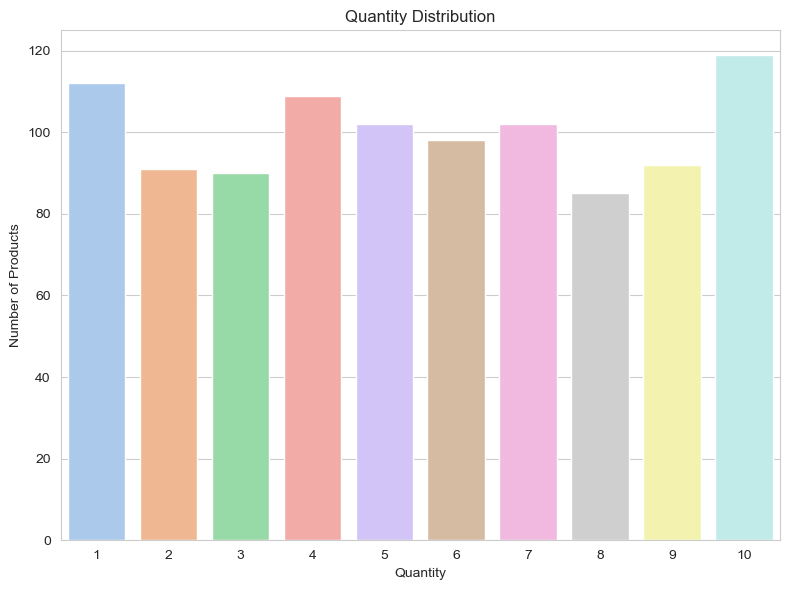

In [37]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x=quantity_counts.index,
    y=quantity_counts.values,
    palette="pastel"
)
plt.xlabel("Quantity")
plt.ylabel("Number of Products")
plt.title("Quantity Distribution")
plt.tight_layout() 

plt.show()

In [38]:
tem_df['unit_price'].describe()

count    1000.000000
mean       55.672130
std        26.494628
min        10.080000
25%        32.875000
50%        55.230000
75%        77.935000
max        99.960000
Name: unit_price, dtype: float64

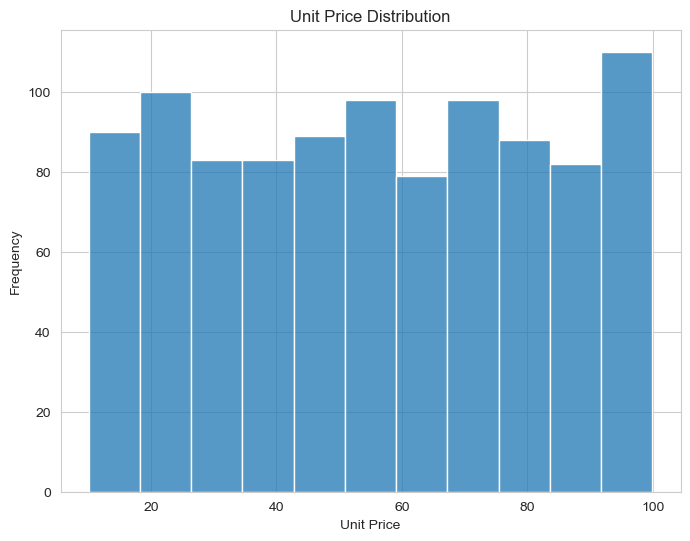

In [39]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(
    tem_df,
    x="unit_price",
    palette="pastel"
)
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.title("Unit Price Distribution")
plt.show()

### OBSERVATION

1. The unit price distribution histogram provides insights into the range and frequency of product prices.
2. The x-axis (unit price) indicates the range of prices for products and height and shape of the bars on the y-axis (frequency) reflect how many products fall within specific price ranges

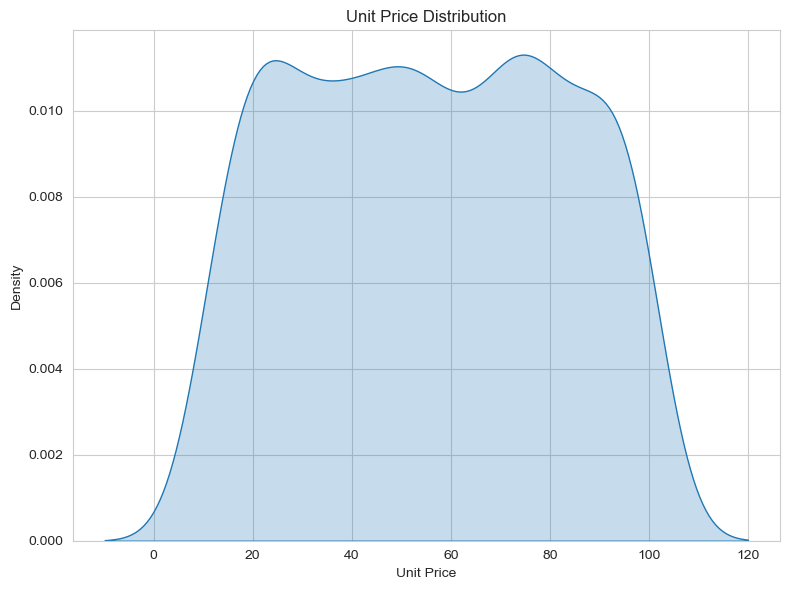

In [40]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.kdeplot(
    df["unit_price"],
    shade=True,
    palette="pastel",
)
plt.xlabel("Unit Price")
plt.ylabel("Density")
plt.title("Unit Price Distribution")
plt.tight_layout()
plt.show()

### OBSERVATION

1. This kernel density plot provides a more continuous view of the unit price distribution.
2. It helps visualize the density peaks and potential skewness that might not be as evident in a histogram.
3. A peak leaning towards the left suggests more products are concentrated in the lower price range, while a rightward lean indicates a possible concentration at higher prices.


In [41]:
df.columns

Index(['invoice_id', 'city', 'customer_type', 'gender', 'product_line',
       'unit_price', 'quantity', 'tax_5%', 'total', 'date', 'time', 'payment',
       'cogs', 'gross_margin_percentage', 'gross_income', 'rating',
       'total_expenditure_per_customer', 'average_order_value',
       'weekend_or_weekday'],
      dtype='object')

In [42]:
customer_type_count = df['customer_type'].value_counts().sort_values(ascending=False)
customer_type_count

customer_type
Member    501
Normal    499
Name: count, dtype: int64

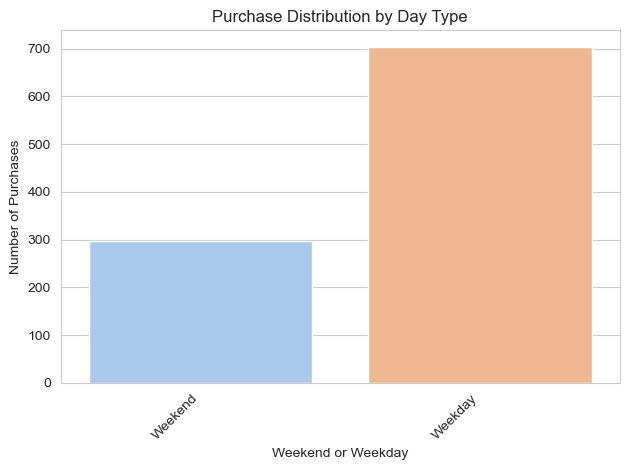

In [43]:
sns.countplot(
    x="weekend_or_weekday",
    data=df,
    palette="pastel"
)
plt.xlabel("Weekend or Weekday")
plt.ylabel("Number of Purchases")
plt.title("Purchase Distribution by Day Type")
plt.xticks(rotation=45, ha="right") 
plt.tight_layout()
plt.show()

### OBSERVATION

1. The above Purchase Distribution by Day Type Count Plot is represented among number of purchases with Weekend/Weekday.
2. This count plot reveals that weekdays likely experience a higher number of purchases compared to weekends

**EDA Bivariate Analysis**
Now, let’s move ahead with bivariate analysis. Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous

### EDA Bivariate Analysis

### Numerical Vs Numerical

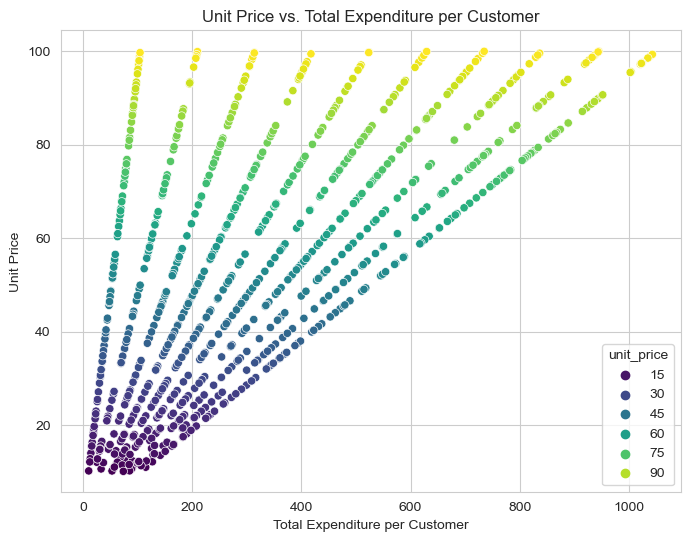

In [44]:
sns.set_style("whitegrid")  
plt.figure(figsize=(8, 6)) 

sns.scatterplot(
    x="total_expenditure_per_customer",
    y="unit_price",
    hue="unit_price",  
    palette="viridis", 
    data=df
)

plt.xlabel("Total Expenditure per Customer")
plt.ylabel("Unit Price")
plt.title("Unit Price vs. Total Expenditure per Customer")
plt.show()

### OBSERVATION

**Relationship Between Unit Price and Total Expenditure:**

1. The plot shows a scatter of points, where each point represents unit price with respect to total expenditure per customer.
2. The horizontal position on the x-axis indicates a customer's total expenditure per customer, and the vertical position on the y-axis represents the unit price of an item the customer purchased.


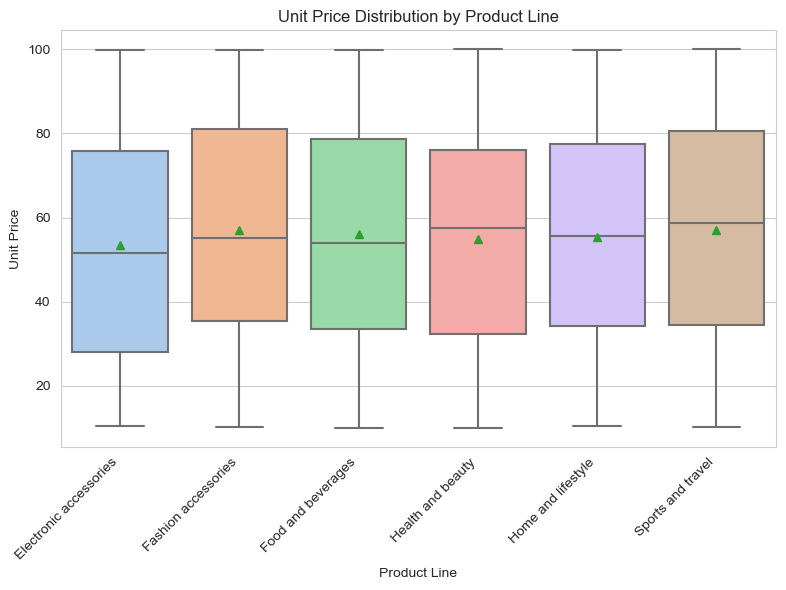

In [73]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x="product_line",
    y="unit_price",
    showmeans=True,
    palette="pastel",
    data=df
)
plt.xlabel("Product Line")
plt.ylabel("Unit Price")
plt.title("Unit Price Distribution by Product Line")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### OBSERVATION

This box plot provides insights into how unit prices vary across different product lines.

1. **Price Range by Product Line**: The box plot displays the distribution of unit prices for each product line on the x-axis (Product Line). The boxes show the interquartile range (IQR) for each line, indicating the middle 50% of unit prices.

2. **Median Price Differences**: The horizontal lines within the boxes represent the median unit price for each product line. By comparing these medians, you can identify lines with generally higher or lower priced products.

3. **Price Variability**: The size and spread of the boxes indicate the variability of unit prices within each product line. A wider box suggests a larger range of prices for that line, while a narrower box indicates more consistent pricing within the line.

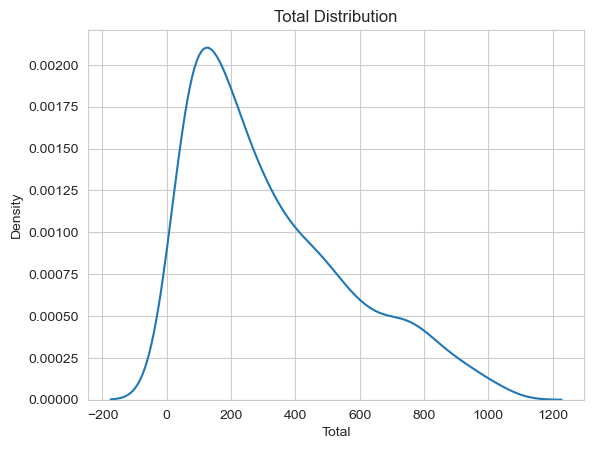

In [45]:
# KDE Plot
sns.kdeplot(df["total"])
plt.xlabel("Total")
plt.ylabel("Density")
plt.title("Total Distribution")
plt.show()

### OBSERVATION

The following is a Kernel Denstiy Estimation graph where:

    X-axis: Represents the total expenditure per customer.

    Y-axis: Represents the density of customers who spent a certain amount. Higher density indicates more customers spending around that particular total expenditure.

Curve: The smooth line represents the kernel density estimation. It depicts the probability distribution of the total expenditure, continuously showing how many customers fall within specific spending ranges

### Categorical Vs Categorical

In [46]:
gp_crosstab=pd.crosstab(df['gender'], df['product_line'])
gp_crosstab

product_line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
gender,,,,,,
Female,84,96,90,64,79,88
Male,86,82,84,88,81,78


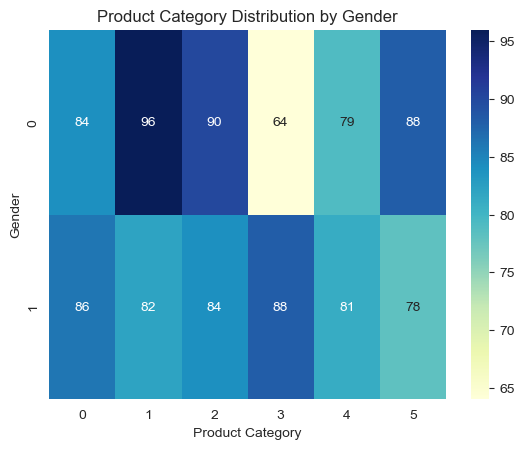

In [47]:
heatmap_data = gp_crosstab.to_numpy()

# Create heatmap with Seaborn
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu') 
plt.xlabel("Product Category")
plt.ylabel("Gender")
plt.title("Product Category Distribution by Gender")
plt.show()

### OBSERVATION

1. Analyzing purchase counts by gender reveals some interesting patterns. 
2. Females tend to purchase more in categories like "Fashion accessories" and "Health and beauty" compared to males, suggesting a stronger preference for these products. Males, on the other hand, have a slightly higher purchase count for "Sports and travel" items. 
3. However, categories like "Electronic accessories", "Food and beverages", and "Home and lifestyle" show similar purchase patterns for both genders, indicating no clear preference based on gender for these categories.

In [48]:
temp_df=gp_crosstab
temp_df

product_line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
gender,,,,,,
Female,84,96,90,64,79,88
Male,86,82,84,88,81,78


In [49]:
temp_df.describe()

product_line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,85.000000,89.000000,87.000000,76.000000,80.000000,83.000000
std,1.414214,9.899495,4.242641,16.970563,1.414214,7.071068
min,84.000000,82.000000,84.000000,64.000000,79.000000,78.000000
25%,84.500000,85.500000,85.500000,70.000000,79.500000,80.500000
50%,85.000000,89.000000,87.000000,76.000000,80.000000,83.000000
75%,85.500000,92.500000,88.500000,82.000000,80.500000,85.500000
max,86.000000,96.000000,90.000000,88.000000,81.000000,88.000000


### OBSERVATION
1. Since all 'count' values are 2.0, the standard deviation for most product lines is close to 1.41, suggesting a very narrow spread in purchase counts for both males and females. 
2. This might indicate consistent purchase patterns across genders for these product lines with only two data points observed.

In [50]:
gq_crosstab = pd.crosstab(df['gender'], df['quantity'])
gq_crosstab

quantity,1,2,3,4,5,6,7,8,9,10
gender,,,,,,,,,,
Female,45,44,41,55,56,50,49,42,56,63
Male,67,47,49,54,46,48,53,43,36,56


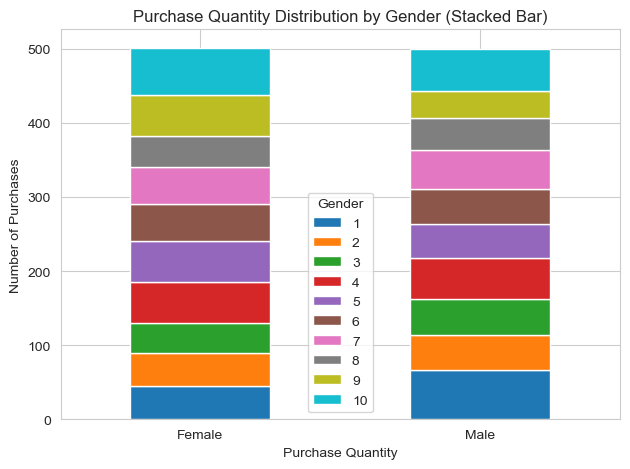

In [51]:
gq_crosstab.plot(kind='bar', stacked=True)
plt.xlabel("Purchase Quantity")
plt.ylabel("Number of Purchases")
plt.title("Purchase Quantity Distribution by Gender (Stacked Bar)")
plt.legend(title="Gender")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### OBSERVATION

### **Quantity Distribution:**

Overall: It's difficult to determine a clear preference for a specific purchase quantity across both genders. The data shows a spread across various quantities.Females seem to have a slightly higher frequency of purchases in the higher quantity range (8, 9, 10) compared to males. This might suggest a tendency to buy in larger quantities at times.While not as pronounced as females, males also show some purchases in the higher quantity range (8, 9, 10).

### **Comparison by Quantity**:

Lower Quantities (1-4): Both genders have purchases in these quantities, suggesting they might buy single items or smaller quantities sometimes. Females seem to have slightly higher purchase frequencies for quantities 1 and 2 compared to males.

Mid-Range Quantities (5-7): Both genders show purchases in this range, with somewhat similar frequencies across most quantities.

In [52]:
gu_crosstab = pd.crosstab(df['gender'], df['unit_price'])
gu_crosstab

unit_price,10.08,10.13,10.16,10.17,10.18,10.53,10.56,10.59,10.69,10.75,...,99.70,99.71,99.73,99.78,99.79,99.82,99.83,99.89,99.92,99.96
gender,,,,,,,,,,,,,,,,,,,,,
Female,0,0,1,0,1,1,0,1,1,0,...,0,1,1,0,0,0,0,0,0,0
Male,1,1,0,1,0,0,1,0,0,1,...,1,0,0,1,1,2,1,1,1,2


### Categorical Vs Numerical

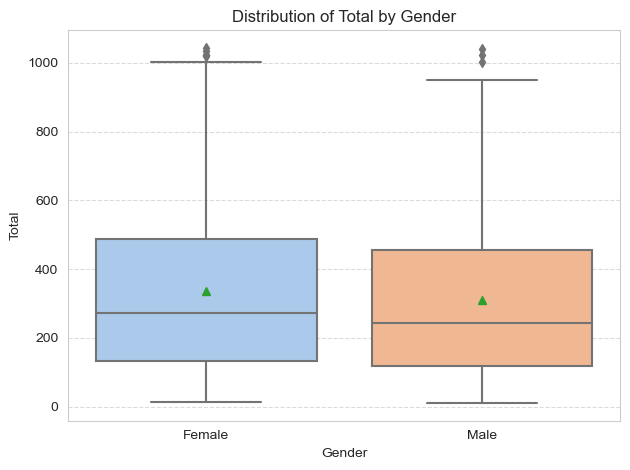

In [53]:
sns.boxplot(
    x = "gender",
    y = "total",
    showmeans=True,
    data=tem_df,
    palette="pastel"
)

plt.xlabel("Gender")
plt.ylabel("Total")
plt.title("Distribution of Total by Gender")
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.tick_params(bottom=False)  
plt.tight_layout()
plt.show()

### OBSERVATION

The box plot shows the distribution of total expenditure for male and female customers
(represented on the x-axis labeled "Gender").

1. The horizontal lines within the boxes represent the median total expenditure for each gender.
2. Female's median is higher than the Male, suggesting a potential difference in average spending habits.
3. Spread of Expenditures: The size and spread of the boxes can reveal how variable the total expenditure is for each gender. A wider box indicates more variability in spending compared to a narrower box.


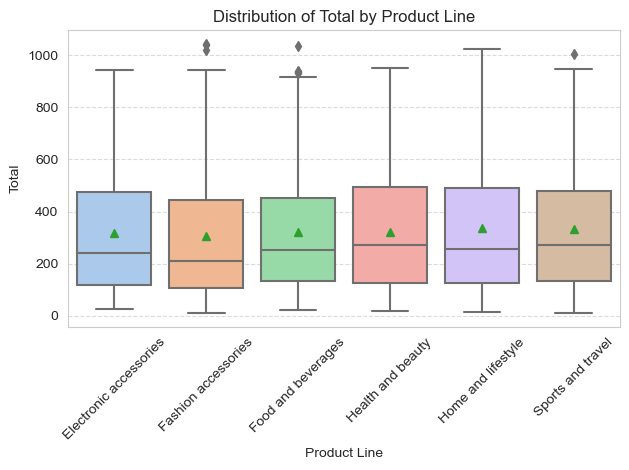

In [54]:
sns.boxplot(
    x = "product_line",
    y = "total",
    showmeans=True,
    data=tem_df,
    palette="pastel"
)

plt.xlabel("Product Line")
plt.ylabel("Total")
plt.title("Distribution of Total by Product Line")
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.tick_params(bottom=False) 
plt.tight_layout()
plt.show()

### OBSERVATION

The above boxplot graph shows the distribution of total expenditure across different product lines.
1. Outliers in Electronic Accesories, Fashion Acessories, Food and beverages, Health and beauty, Home and lifestyle and Sports and Travel.

2. The "Home and Lifestyle" product line has the highest median total expenditure. This suggests customers tend to spend the most on average when purchasing products from this line compared to other lines.


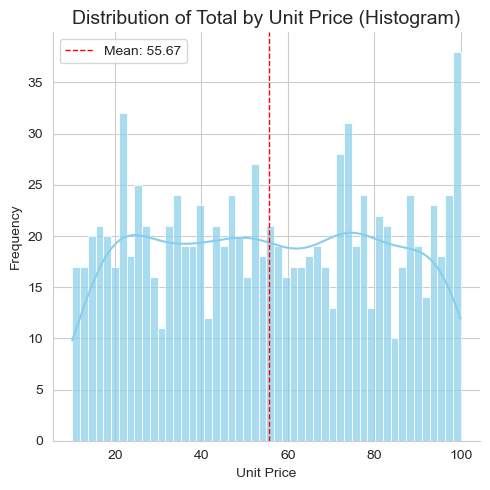

In [64]:
sns.displot(
    tem_df["unit_price"],
    bins=50,
    kde=True,
    color="skyblue",
    alpha=0.7
)

mean_value = tem_df["unit_price"].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}') 

plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.title("Distribution of Total by Unit Price (Histogram)", fontsize=14)
plt.xticks(rotation=0)


plt.tick_params(bottom=False, which='minor')

plt.legend()
plt.tight_layout()
plt.show()


### OBSERVATION

The distribution appears to be right-skewed. This indicates that most purchases concentrate around lower unit prices, with a smaller proportion of purchases happening at higher unit prices.

**Spread**: The histogram exhibits a wider spread towards the higher unit price range. This suggests that there's a larger variation in total purchase amounts at higher unit prices compared to lower unit prices. This could be due to a wider variety of products or larger quantities purchased at those price points.

**Mean Line (dashed red line)**: The mean line is located towards the left side of the distribution, which aligns with the right-skewed shape. This indicates that the average total purchase amount leans more towards the lower unit price range.

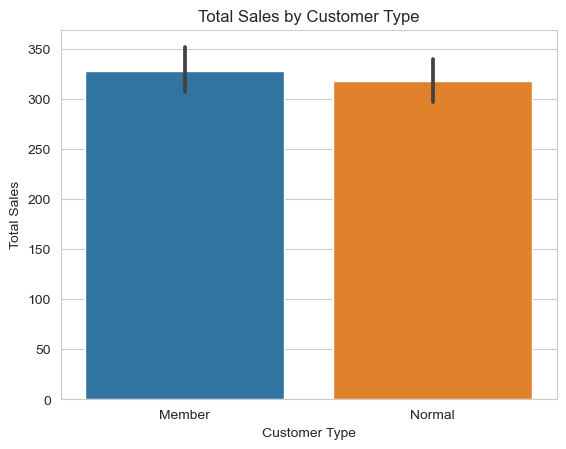

In [65]:
# Considering categorical column: customer_type
sns.barplot(x = df['customer_type'], y = df['total'])
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Customer Type')
plt.show()


### OBSERVATION
1. Total Sales by Customers with membership are more than Total Sales by Normal Customers.
2. This helps us to represent that Customers with memberships generate a higher proportion of total sales.

**EDA Multivariate Analysis**
As the name suggests, Multivariate analysis looks at more than two variables. Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset.

A heat map is widely been used for Multivariate Analysis

Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.

In [80]:
numerical_cols=['unit_price',
 'quantity',
 'total',
 'cogs',
 'gross_income',
 'rating',
 'total_expenditure_per_customer',
 'average_order_value']
numerical_cols

['unit_price',
 'quantity',
 'total',
 'cogs',
 'gross_income',
 'rating',
 'total_expenditure_per_customer',
 'average_order_value']

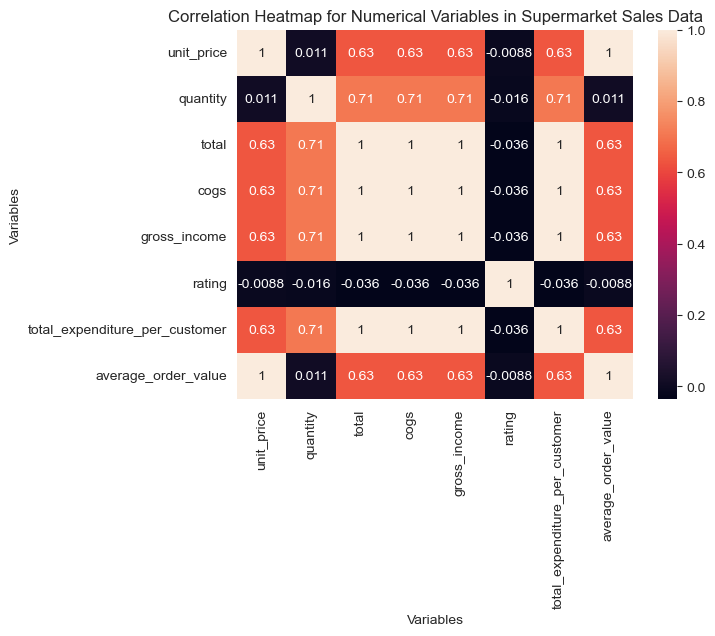

In [81]:
df_filtered = df[numerical_cols]

# Create a correlation matrix
correlation = df_filtered.corr()

# Create a heatmap
sns.heatmap(correlation, annot=True) 

plt.title('Correlation Heatmap for Numerical Variables in Supermarket Sales Data')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()


 ### HeatMap
 
The heatmap displays color intensity to **represent the correlation coefficient between pairs of variables**.
Stronger correlations (positive or negative) are depicted by more intense colors (red for positive, blue for negative).
This allows us to quickly identify which numerical variables in the data might be related and the direction of that relationship.

### **Observation**:
Examples:
1. **unit_price and quantity** : higher price might lead to lower quantity sold.

2. **Gross Income vs. Rating**: The correlation coefficient of -0.0088 between gross_income and rating is very close to zero. This suggests an extremely weak or practically no linear relationship between these two variables in your data.The negative sign indicates a very slight tendency for higher gross income to be associated with slightly lower ratings.

### Multivariate Analysis for HeatMap:
1. **Customers with higher gross income tend to have higher total purchases and higher average spending per visit**. (dark red squares in the heatmap indicate strong positive correlations between variables. There is a correlation of 0.63 between gross_income, total, and total_expenditure_per_customer)


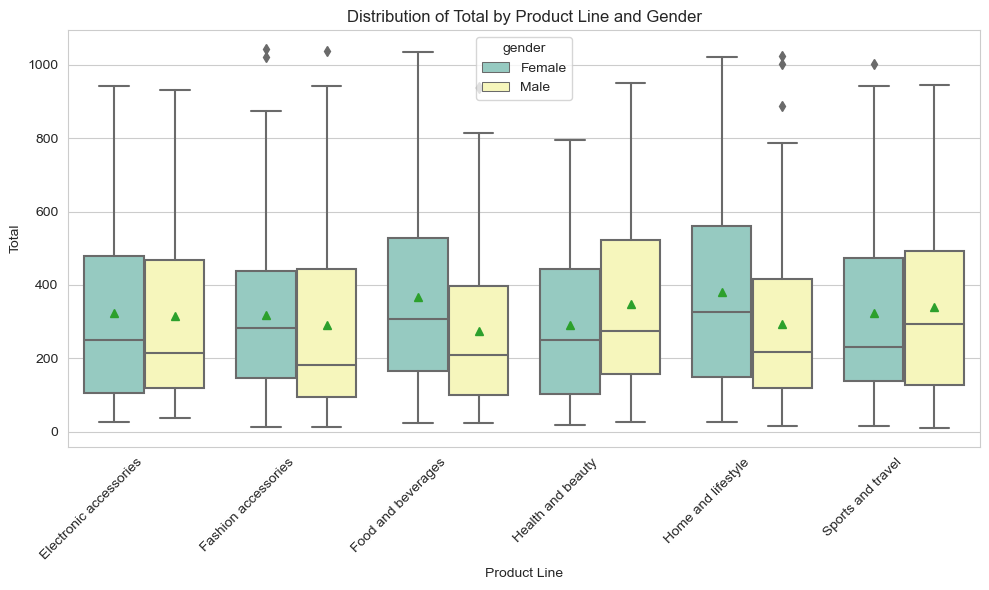

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x = "product_line",
    y = "total",
    hue = "gender",
    showmeans=True, 
    data=tem_df,
    palette="Set3"  
)

plt.xlabel("Product Line") 
plt.ylabel("Total")
plt.title("Distribution of Total by Product Line and Gender")
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()

### OBSERVATION
*   **Comparison Between Genders:**
Some product lines with a wider price range ("Electronic accessories" and "Home and lifestyle"), the median for the female gender (gree boxes) might be slightly higher than the male gender (yellow boxes). This could indicate that females tend to spend more on average on these product lines when they make purchases.

    Product lines like "Food and beverages" and "Health and beauty", the boxes appear to have similar widths for both genders, suggesting similar variation in spending between genders.


*   **Distribution within Product Lines:**
"Electronic accessories" and "Home and lifestyle" have a wider range suggesting a larger range of total amounts spent on these product lines (regardless of gender). This could be due to a wider variety of products or larger quantities purchased within these lines.

*   All product lines Except "Electronic accessories" and "Health and Beauty" have few outliers





In [70]:
numerical_cols = ['unit_price', 'quantity', 'tax_5%', 'total', 'cogs', 'gross_margin_percentage', 'gross_income', 'rating', 'total_expenditure_per_customer', 'average_order_value']
skewness = df[numerical_cols].skew()

# Create a DataFrame with column names
df_skew = pd.DataFrame({'Column': skewness.index, 'Skew': skewness.values})

df_skew['Interpretation'] = df_skew['Skew'].apply(lambda x: 
                                                   "Right Skewed" if x > 0 else 
                                                   ("Left Skewed" if x < 0 else "Symmetrical"))


df_skew['Skew'] = df_skew['Skew'].apply(lambda x: f"{x:.2f}")

print(df_skew.to_string(index=False))


                        Column Skew Interpretation
                    unit_price 0.01   Right Skewed
                      quantity 0.01   Right Skewed
                        tax_5% 0.89   Right Skewed
                         total 0.89   Right Skewed
                          cogs 0.89   Right Skewed
       gross_margin_percentage 0.00    Symmetrical
                  gross_income 0.89   Right Skewed
                        rating 0.01   Right Skewed
total_expenditure_per_customer 0.89   Right Skewed
           average_order_value 0.01   Right Skewed


#### OBSERVATION

1. **Right Skewness**:
Most numerical columns (except gross_margin_percentage) exhibit right skewness.
This means the distribution of values in these columns is likely skewed towards higher values.
For example, unit_price, quantity, tax_5%, total, cogs, gross_income, and total_expenditure_per_customer might have a higher concentration of data points on the lower end and a longer tail extending towards larger values.

2. **Symmetrical Distribution**:
gross_margin_percentage is the only column with a skewness close to zero, suggesting a relatively symmetrical distribution. 
This means the data points for this variable are likely more evenly distributed across the range of possible values.
3. **Interpretation**: 
Right skewness in sales-related columns like unit_price, quantity, total, etc., could indicate that there might be a few instances of high sales volume or expensive products, potentially influencing the overall average.

# 5 Conclusion




- Data Analysis helps to find the basic structure of the dataset.
- Dropped columns that are not adding value to our analysis.
- Performed Feature Engineering by adding some columns which contribute to our analysis.
- Data Transformations have been used to normalize the columns.
- We used different visualizations for EDA like Univariate, Bi-Variate, and Multivariate Analysis.
- Through EDA, we got useful insights

### EDA Project Conclusion: Unveiling Insights from Supermarket Sales Data

### Data Wrangling:

- Identified and addressed missing values, duplicate rows, and low-cardinality columns.
- Performed feature engineering to create new informative features.

### Univariate Analysis:

- Analyzed distributions of features like "Date," "Gender," product quantities, and unit prices to understand buying patterns and temporal trends.

### Bivariate Analysis:

- Numerical vs. Numerical: Explored relationships between unit price and total expenditure, unit price and product line, and total sales density. These analyses could reveal how price affects spending habits and product category variations.

- Categorical vs. Categorical: Examined "Gender" with "Product category," "Quantity," and "Unit Price" to uncover potential gender-based buying behaviors.

- Categorical vs. Numerical: Analyzed "Gender" vs. "Total Sales," "Product Line" vs. "Total Sales," unit price frequency, and "Customer type" vs. "Total Sales" to identify spending patterns based on gender, product categories, price ranges, and customer types.

### Multivariate Analysis and Skewness:

- Created a heatmap to explore correlations between all numerical columns, potentially revealing dependencies among various features.

- Examined total sales by product line and gender using visualizations to identify interactions between these factors.

- Checked the skewness of numerical data to ensure normality assumptions for further analysis techniques.